<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson-1:-Overview-of-A/B-Testing" data-toc-modified-id="Lesson-1:-Overview-of-A/B-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson 1: Overview of A/B Testing</a></span><ul class="toc-item"><li><span><a href="#A/B-Testing-Intro" data-toc-modified-id="A/B-Testing-Intro-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A/B Testing Intro</a></span><ul class="toc-item"><li><span><a href="#What-A/B-Testing-Is-Good-at:" data-toc-modified-id="What-A/B-Testing-Is-Good-at:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>What A/B Testing Is Good at:</a></span></li><li><span><a href="#What-A/B-Testing-Cannot-Do:" data-toc-modified-id="What-A/B-Testing-Cannot-Do:-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>What A/B Testing Cannot Do:</a></span></li><li><span><a href="#Alternatives-when-A/B-Testing-cannot-do-the-job:" data-toc-modified-id="Alternatives-when-A/B-Testing-cannot-do-the-job:-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Alternatives when A/B Testing cannot do the job:</a></span></li></ul></li><li><span><a href="#Example-Walk-Through" data-toc-modified-id="Example-Walk-Through-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example Walk Through</a></span><ul class="toc-item"><li><span><a href="#Example:" data-toc-modified-id="Example:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Example:</a></span></li><li><span><a href="#Picking-A-Good-Metric" data-toc-modified-id="Picking-A-Good-Metric-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Picking A Good Metric</a></span></li><li><span><a href="#Review-Statistics" data-toc-modified-id="Review-Statistics-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Review Statistics</a></span><ul class="toc-item"><li><span><a href="#Binomial-Distribution" data-toc-modified-id="Binomial-Distribution-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Binomial Distribution</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Lesson 1: Overview of A/B Testing

## A/B Testing Intro

### What A/B Testing Is Good at:

Generally A/B Testing can be used to test a variety of things:
- Different Color Design
- Recommendation Systems (e.g. Amazon -- product recommendation => shows huge revenue increase by adding that feature
- Ranking Changes:
    1. LinkedIn tested whether to use top slot on a user's stream for top news articles v.s. encouragement to add more contracts)
    2. Google tested ranking changes for search results v.s. 
- Underlying infrastructure change: (e.g. Amazon -- every 100 ms increase in page load time decreases sales by 1%)


### What A/B Testing Cannot Do:

Things A/B Testing __CANNOT__ do or are __less useful__ in:
- New Experiences: Change Aversion Users v.s. Novelty effect
- Time Effect:
    1. Novelty Effect itself -- do you want to wait until a plateau until user adapts to your new experience? If so, how long?
    2. Time itself as to the nature of business: e.g. If you are running a rental website -- the length of people actually need to look for an apartment from time to time is really rare; how would you factor that in through short term A/B testing?
    
- __Cannot tell you if you are missing something__

### Alternatives when A/B Testing cannot do the job:

- Retrospective/Perspective Analysis
- UX Research; Focus Group; Human Evaluation

These can be helpful to provide qualitative data v.s. quantitative data from A/B Testing

## Example Walk Through

### Example:

![Audacity Example](http://napitupulu-jon.appspot.com/galleries/abtesting/1w4.jpg)

### Picking A Good Metric

In the example from the course, we picked:
$$\text{click-through-rate (CTR)} = \frac{\text{Number of Clicks}}{\text{Number of Page Views}}$$

Alternatively, we can use:
$$\text{click-through-probability} = \frac{\text{Unique Visitors Who Click}}{\text{Unique Visitors to Page}} $$

----
__Why using Click-through-probability instead of click-through-rate?__ <br>

Generally Speaking: <br>
- Use a rate when you want to measure the usability ==> i.e. How often users find that particular button/feature
- Use probability when you want to measure total impact ==> i.e. Whether users progress to the next level of funnel or not (You probably don't care if they double clicked or reload the page as long as they get to the next page)

### Review Statistics

#### Binomial Distribution

We can simulate a binomial distribution by tossing an uneven coin, with heads probability of 0.75 and tail probability of 0.25:

In [1]:
import numpy as np
from scipy.stats import binom

np.random.seed(123)

n, p = 10, 0.75
dist = binom(n, p)

We can see the following distribution with 10 flips:

Text(0, 0.5, 'Probability')

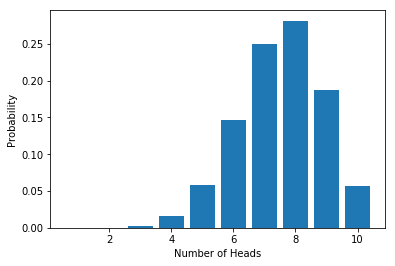

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(1,11)
plt.bar(x, dist.pmf(x))
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

As we increase n, the distribution looks more like a normal distribution:

Text(0, 0.5, 'Probability')

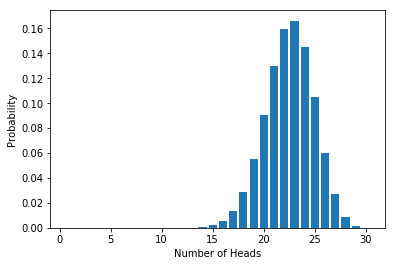

In [3]:
n, p = 30, 0.75
x = np.arange(1,31)
dist = binom(n,p)
plt.bar(x, dist.pmf(x))
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

In order to use Binomial Distribution, the following __must__ hold:
1. Only 2 Types of Outcomes:
    - Heads
    - Tails
2. Each event is independent (__this can be tricky in real life__) -- i.e. the previous event would have no impact on the following event
3. Identical distribution -- p needs to be same for all

---
Formula:
$$ \text{Mean = p} $$
$$\text{Standard Deviation} = \sqrt{\frac{p \ (1-p)}{N}}$$